<a href="https://colab.research.google.com/github/sandeep12kumar/Stroke-Analysis/blob/main/Stroke_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Sem 5/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
data_shape = df.shape
num_rows, num_columns = data_shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 5110
Number of columns: 12


In [6]:
df_info = df.info()
print(df_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None


In [7]:
data_summary = df.describe()
print(data_summary)

                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0

In [8]:
null_values = df.isnull().sum()
print("Null values in the dataset:")
print(null_values)

Null values in the dataset:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [11]:
df_cleaned = df.dropna()
null_values_after_drop = df_cleaned.isnull().sum()
print("Null values in the cleaned dataset:")
print(null_values_after_drop)

Null values in the cleaned dataset:
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


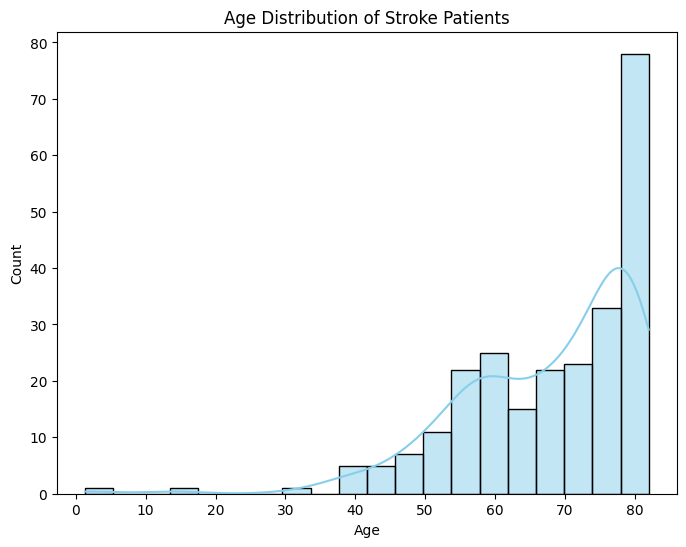

In [13]:
stroke_patients = df[df['stroke'] == 1]
plt.figure(figsize=(8, 6))
sns.histplot(stroke_patients['age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution of Stroke Patients')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

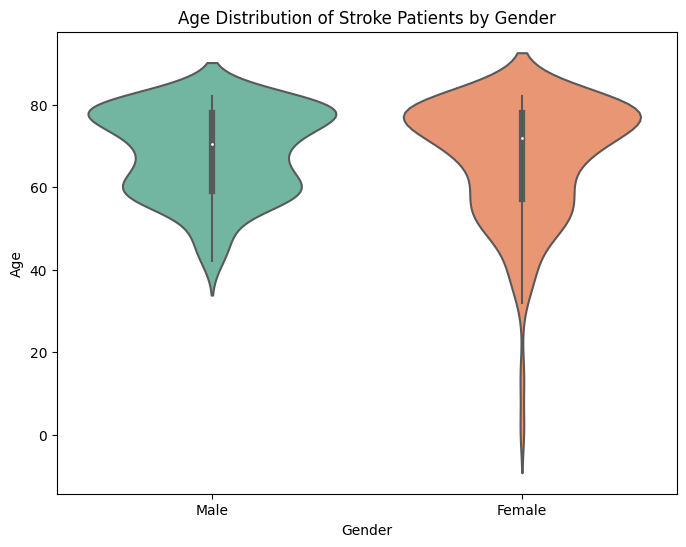

In [15]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='gender', y='age', data=stroke_patients, palette="Set2")
plt.title('Age Distribution of Stroke Patients by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

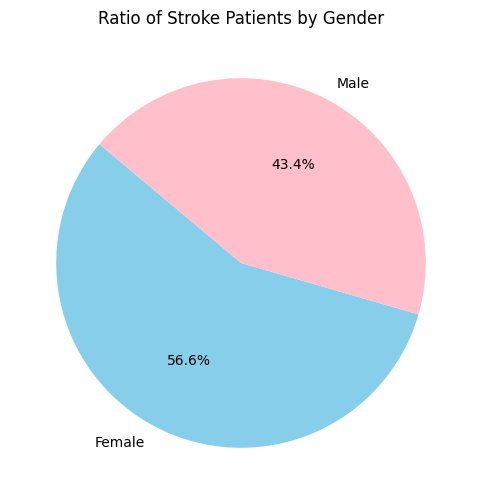

In [16]:
stroke_patient_gender_counts = df[df['stroke'] == 1]['gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(stroke_patient_gender_counts, labels=stroke_patient_gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'pink'])
plt.title('Ratio of Stroke Patients by Gender')
plt.show()

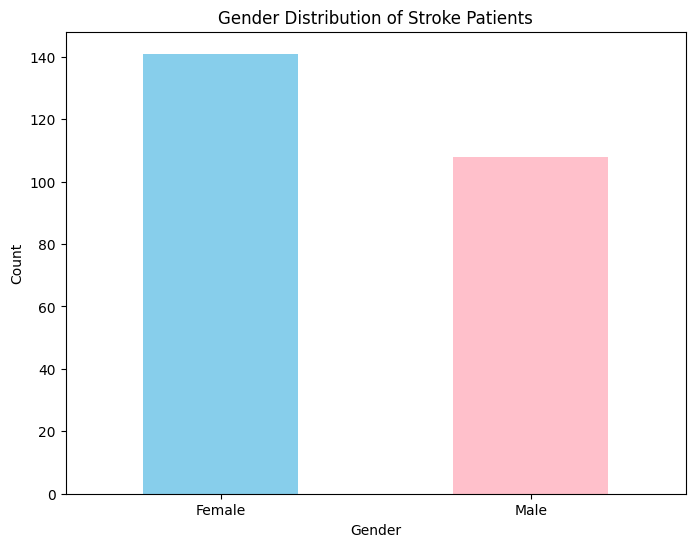

In [18]:
gender_counts = df[df['stroke'] == 1]['gender'].value_counts()
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar', color=['skyblue', 'pink'])
plt.title('Gender Distribution of Stroke Patients')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

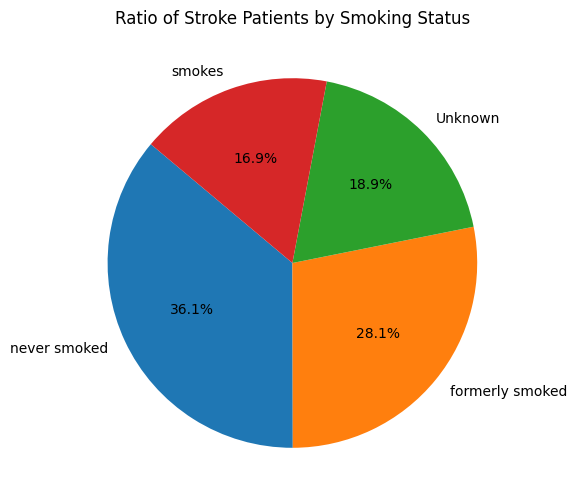

In [19]:
smoking_counts = df[df['stroke'] == 1]['smoking_status'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(smoking_counts, labels=smoking_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Ratio of Stroke Patients by Smoking Status')
plt.show()

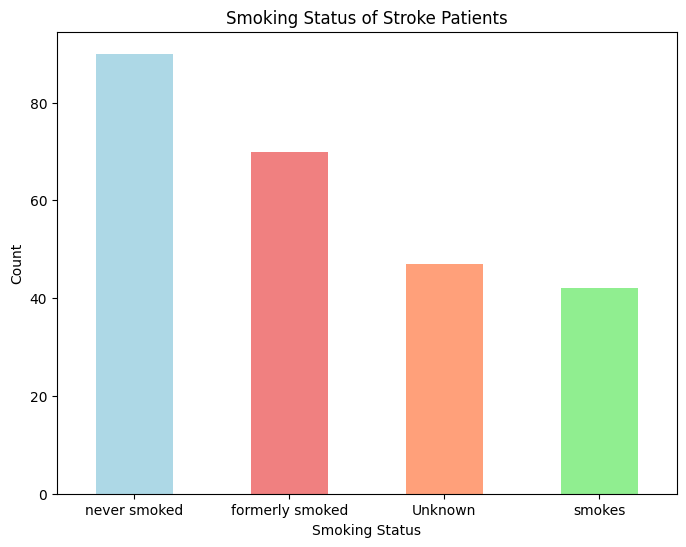

In [20]:
stroke_patients = df[df['stroke'] == 1]
smoking_counts = stroke_patients['smoking_status'].value_counts()
plt.figure(figsize=(8, 6))
smoking_counts.plot(kind='bar', color=['lightblue', 'lightcoral', 'lightsalmon', 'lightgreen'])
plt.title('Smoking Status of Stroke Patients')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

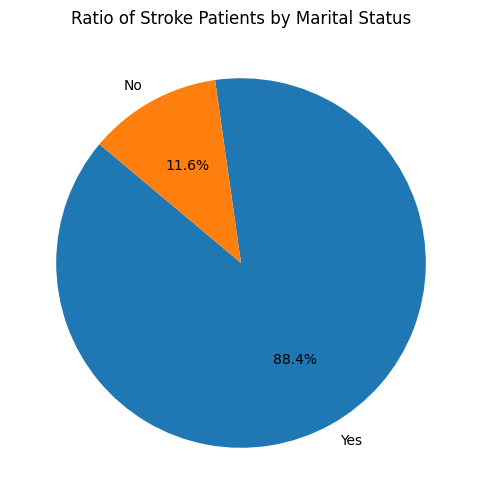

In [22]:
marital_status_counts = df[df['stroke'] == 1]['ever_married'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(marital_status_counts, labels=marital_status_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Ratio of Stroke Patients by Marital Status')
plt.show()

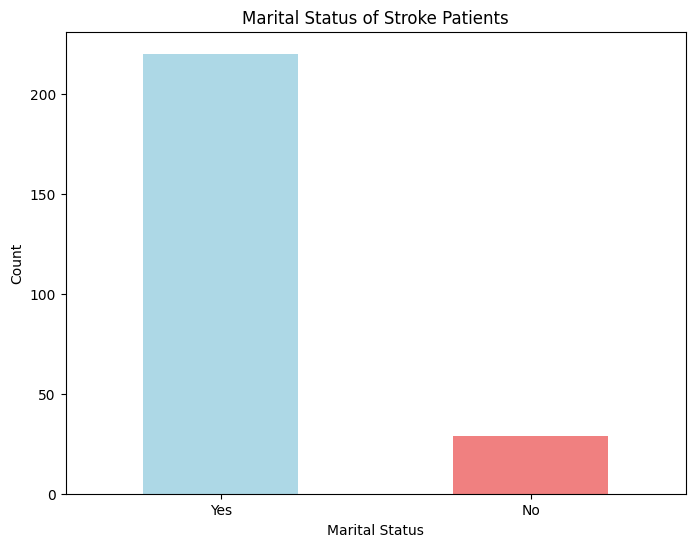

In [23]:
stroke_patients = df[df['stroke'] == 1]
marital_status_counts = stroke_patients['ever_married'].value_counts()
plt.figure(figsize=(8, 6))
marital_status_counts.plot(kind='bar', color=['lightblue', 'lightcoral', 'lightsalmon', 'lightgreen', 'lightpink'])
plt.title('Marital Status of Stroke Patients')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

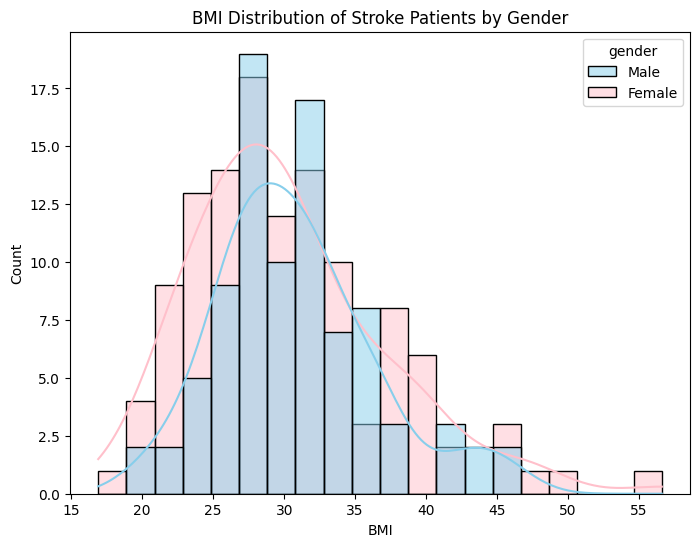

In [25]:
stroke_patients = df[df['stroke'] == 1]
plt.figure(figsize=(8, 6))
sns.histplot(data=stroke_patients, x='bmi', bins=20, kde=True, hue='gender', palette={'Male': 'skyblue', 'Female': 'pink'})
plt.title('BMI Distribution of Stroke Patients by Gender')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

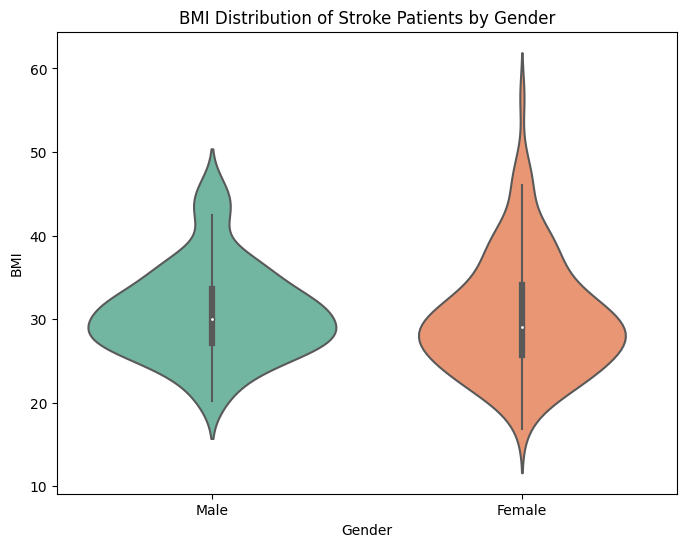

In [26]:
stroke_patients = df[df['stroke'] == 1]
plt.figure(figsize=(8, 6))
sns.violinplot(x='gender', y='bmi', data=stroke_patients, palette="Set2")
plt.title('BMI Distribution of Stroke Patients by Gender')
plt.xlabel('Gender')
plt.ylabel('BMI')
plt.show()

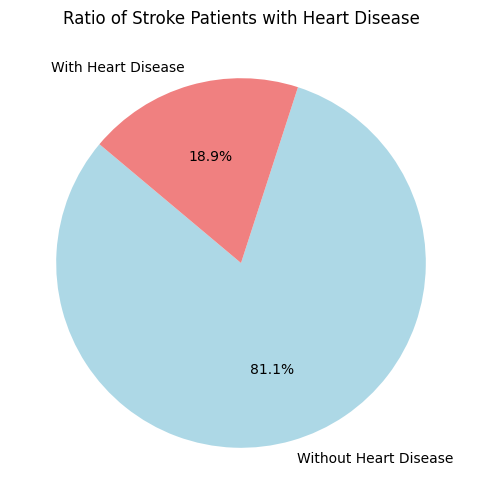

In [27]:
heart_disease_counts = df[df['stroke'] == 1]['heart_disease'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(heart_disease_counts, labels=['Without Heart Disease', 'With Heart Disease'], autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightcoral'])
plt.title('Ratio of Stroke Patients with Heart Disease')
plt.show()

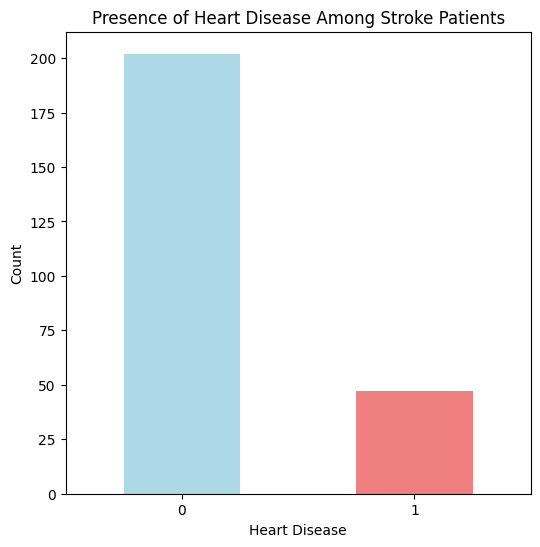

In [33]:
heart_disease_counts = df[df['stroke'] == 1]['heart_disease'].value_counts()
plt.figure(figsize=(6, 6))
heart_disease_counts.plot(kind='bar', color=['lightblue', 'lightcoral'])
plt.title('Presence of Heart Disease Among Stroke Patients')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

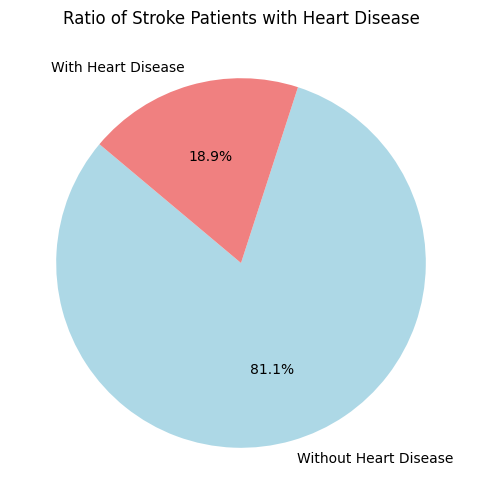

In [35]:
heart_disease_counts = df[df['stroke'] == 1]['heart_disease'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(heart_disease_counts, labels=['Without Heart Disease', 'With Heart Disease'], autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightcoral'])
plt.title('Ratio of Stroke Patients with Heart Disease')
plt.show()

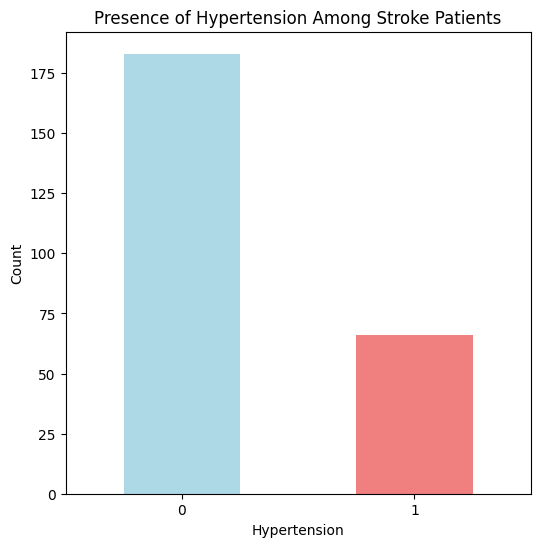

In [36]:
stroke_patients = df[df['stroke'] == 1]
hypertension_counts = stroke_patients['hypertension'].value_counts()
plt.figure(figsize=(6, 6))
hypertension_counts.plot(kind='bar', color=['lightblue', 'lightcoral'])
plt.title('Presence of Hypertension Among Stroke Patients')
plt.xlabel('Hypertension')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

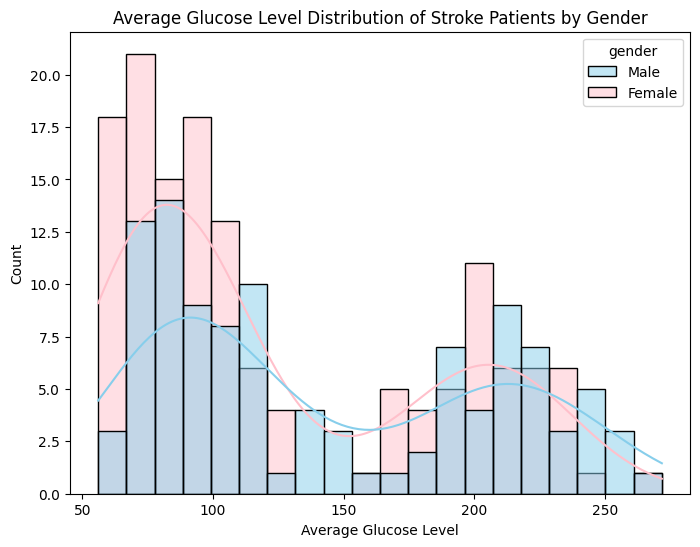

In [37]:
stroke_patients = df[df['stroke'] == 1]
plt.figure(figsize=(8, 6))
sns.histplot(data=stroke_patients, x='avg_glucose_level', bins=20, kde=True, hue='gender', palette={'Male': 'skyblue', 'Female': 'pink'})
plt.title('Average Glucose Level Distribution of Stroke Patients by Gender')
plt.xlabel('Average Glucose Level')
plt.ylabel('Count')
plt.show()

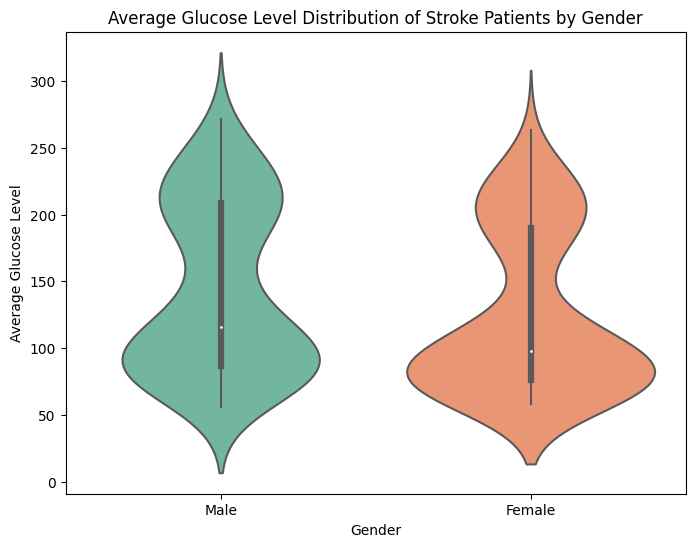

In [38]:
stroke_patients = df[df['stroke'] == 1]
plt.figure(figsize=(8, 6))
sns.violinplot(x='gender', y='avg_glucose_level', data=stroke_patients, palette="Set2")
plt.title('Average Glucose Level Distribution of Stroke Patients by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Glucose Level')
plt.show()

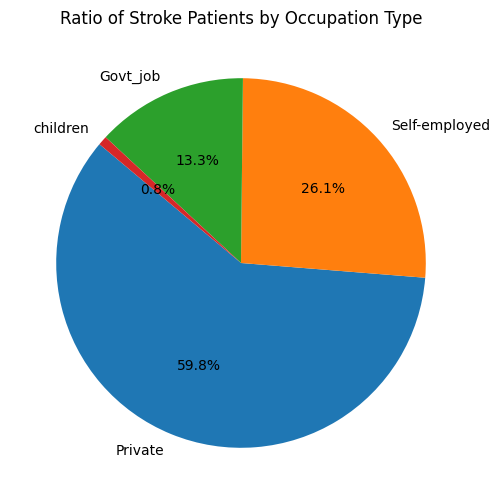

In [39]:
stroke_patients = df[df['stroke'] == 1]
occupation_counts = stroke_patients['work_type'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(occupation_counts, labels=occupation_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Ratio of Stroke Patients by Occupation Type')
plt.show()

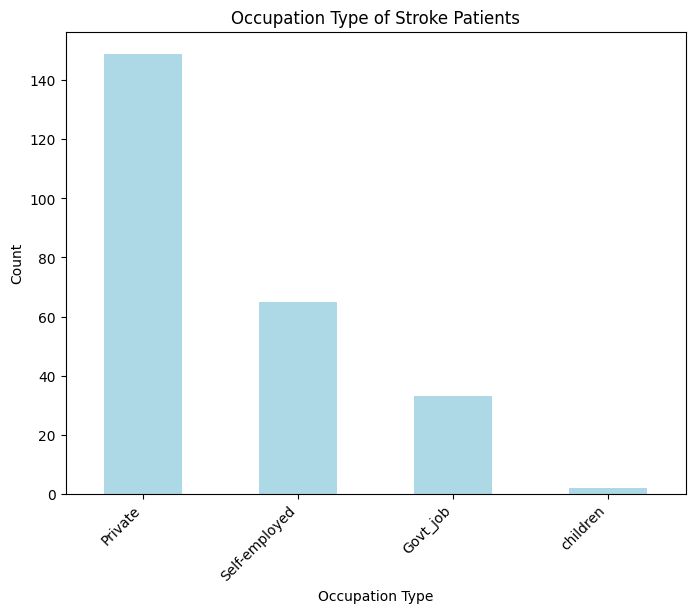

In [40]:
occupation_counts = stroke_patients['work_type'].value_counts()
plt.figure(figsize=(8, 6))
occupation_counts.plot(kind='bar', color='lightblue')
plt.title('Occupation Type of Stroke Patients')
plt.xlabel('Occupation Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

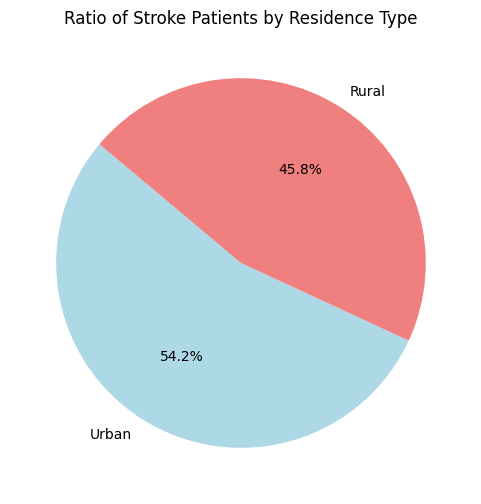

In [41]:
stroke_patients = df[df['stroke'] == 1]
residence_counts = stroke_patients['Residence_type'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(residence_counts, labels=residence_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightcoral'])
plt.title('Ratio of Stroke Patients by Residence Type')
plt.show()

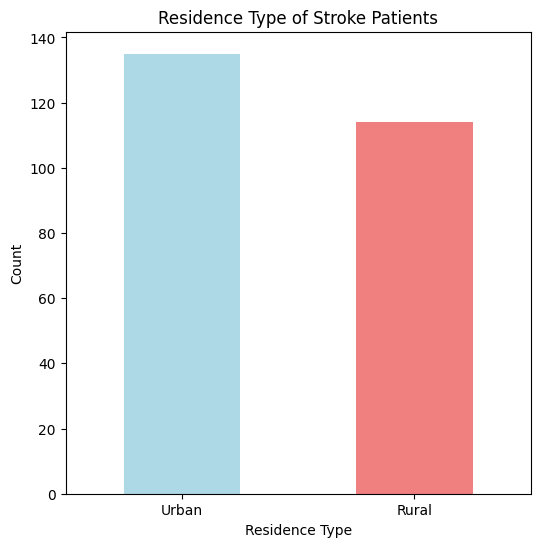

In [42]:
stroke_patients = df[df['stroke'] == 1]
residence_counts = stroke_patients['Residence_type'].value_counts()
plt.figure(figsize=(6, 6))
residence_counts.plot(kind='bar', color=['lightblue', 'lightcoral'])
plt.title('Residence Type of Stroke Patients')
plt.xlabel('Residence Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

<ipython-input-43-7380ca9be4bc>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


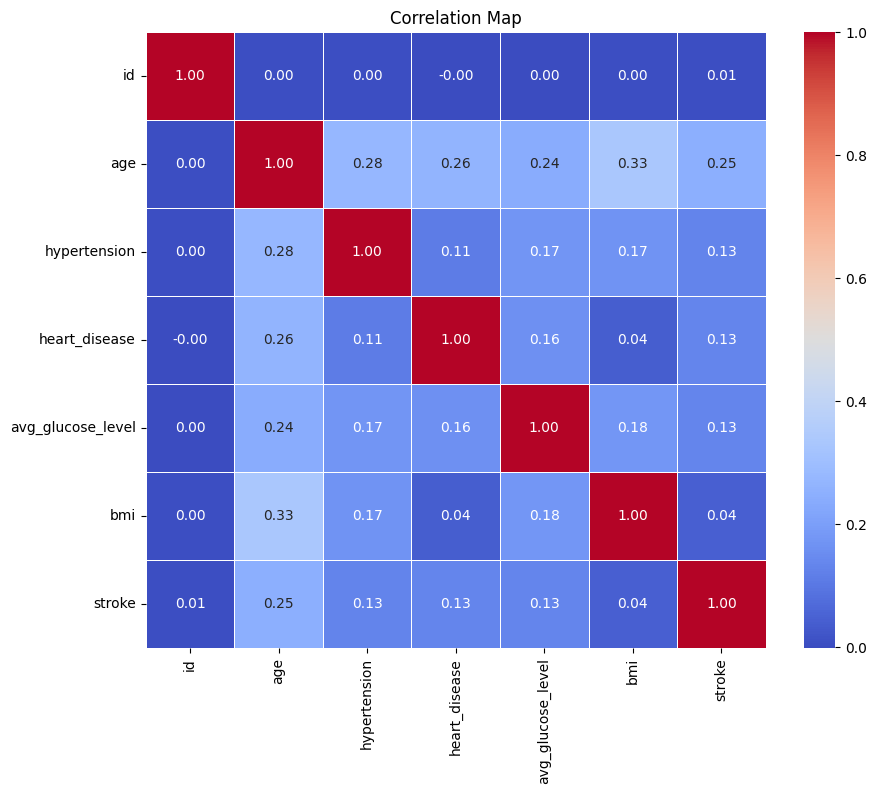

In [43]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Map')
plt.show()